# Final Project Math Bio COVID
Ishaan Rajan, Ian Thomas, Tanner Watts

COST-EFFECTIVENESS AND BACKWARD BIFURCATION ANALYSIS ON COVID-19 TRANSMISSION MODEL CONSIDERING DIRECT AND INDIRECT TRANSMISSION.

July 15th, 2020

For simulation purposes, control theory variables and equations where not used, rather we incorperated variables into the simulation function that represented the intervention methods described in the paper. 

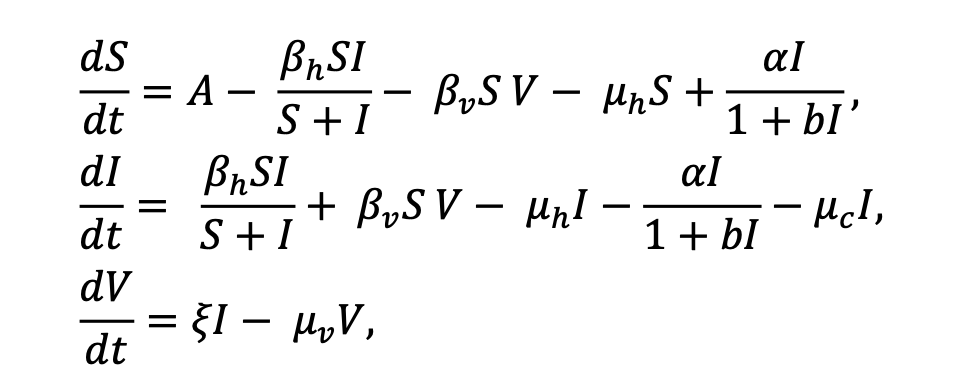

In [ ]:
import numpy as np
import matplotlib as mpl
from numpy import linalg as LA
import matplotlib.pyplot as plt 

# this is a transmition model for covid 19 for direct and indirect transmission
# as well as saturated treatment.



def runSimulation(mask, disinfectant, treatment):
  A = 4.214

  beta_h = 3.5                   # S - I interaction infection rate
  beta_v = 8e-11                 # Surface particle - S population infection rate
  miu_h = 4.214e-5               # Human survival rate
  miu_c = 0.03                   # Existence of the droplets that are free in the environment
  miu_v = 1/2                    # Expected rate of survival of coronavirus in the population environment
  alpha = 3.4                    # Recovery rate
  beta = 1/10000                 # Half saturated parameter
  zeta = 10000                   # Average production of coronavirus from an infected individual

  # set up for time, and params
  Dt = 0.1
  S_start = 80509          # Initial susceptible population 
  I_start = 28             # Initial infected population
  V_start = 5.5e9          # Initial existence of droplets that are free in the environment

  # start and end time
  t_start = 0
  t_end = 25
  n_steps = int(round((t_end-t_start)/Dt)) 

  S_arr = np.zeros(n_steps +1) 
  I_arr = np.zeros(n_steps +1)    
  V_arr = np.zeros(n_steps +1)
  S_arr[0] = S_start              
  I_arr[0] = I_start              
  V_arr[0] = V_start

  t_arr = np.zeros(n_steps + 1)
  t_arr[0] = t_start


  # Euler's method
  for i in range (1, n_steps + 1):
    S = S_arr[i-1]
    I = I_arr[i-1]
    V = V_arr[i-1]
    t = t_arr[i-1] 
    # Equations
    dSdt = A - ((beta_h*(1-mask)**2*S*I)/(S + I)) - (beta_v*S*V) - (miu_h*S) + (((alpha + treatment)* I)/(1+beta*I))
    dIdt = ((beta_h*(1-mask)**2*S*I)/(S + I)) + (beta_v*S*V) - (miu_h*I) - (((alpha + treatment) * I)/(1+beta*I)) - (miu_c*I)
    dVdt = (zeta*I) - ((miu_v + disinfectant) * V)

    # calculate values at next time step
    S_arr[i] = S + Dt*dSdt  
    I_arr[i] = I + Dt*dIdt
    V_arr[i] = V + Dt*dVdt
    t_arr[i] = t + Dt

  # plotting the result
  fig = plt.figure()                                  

  plt.plot(t_arr, S_arr, linewidth = 4, label = 'S(t)', color="red")   

  plt.title('Succeptability Population', fontsize = 12)   
  plt.xlabel('time', fontsize = 12)
  plt.ylabel('S(t)', fontsize = 12)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.grid(True)                       
  plt.axis([t_start, t_end, 0, 100000])  
  plt.legend()
  plt.show()

  fig = plt.figure()                               
  plt.plot(t_arr, I_arr, linewidth = 4, label = 'I(t)')   

  plt.title('Infection Population', fontsize = 12)   
  plt.xlabel('time', fontsize = 12)
  plt.ylabel('I(t)', fontsize = 12)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.grid(True)              
  plt.axis([t_start, t_end, 0, 75000])   
  plt.legend()
  plt.show()

  fig = plt.figure()                              
  plt.plot(t_arr, V_arr, linewidth = 4, label = 'V(t)', color="green")  

  plt.title('Viral Particles', fontsize = 12)    
  plt.xlabel('time', fontsize = 12)
  plt.ylabel('V(t)', fontsize = 12)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.grid(True)                    
  plt.axis([t_start, t_end, 0, 5e9])    
  plt.legend()
  plt.show()


# Run Simulations With Differing Intervention Values 

### No intervention

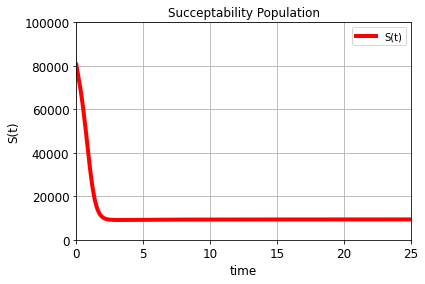

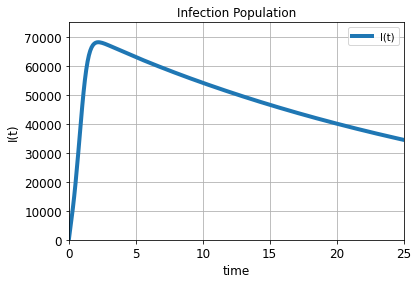

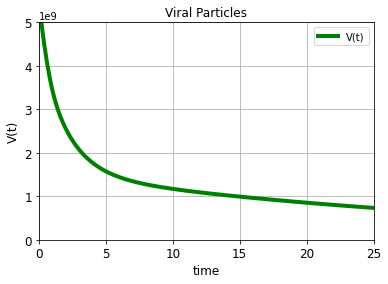

In [ ]:
runSimulation(0,0,0) # run for different t-end

This is our "control" simulation where there are no intervention methods used. Susceptibility and Infection populations have a steady inverse relationship. The Susceptibility population has a sharp decrease in the first few time steps as more of the population are getting infected. This relationship is mirrored in the Infection population where in the first few time steps, exponentially more people are getting infected. The initial Viral Particle population is in parallel with the infected population: as more people are infected, there are more Viral Particles in the population environment, and as the susceptible population decreases, so too does the Viral Particle population. 

### Mask Wearing Only

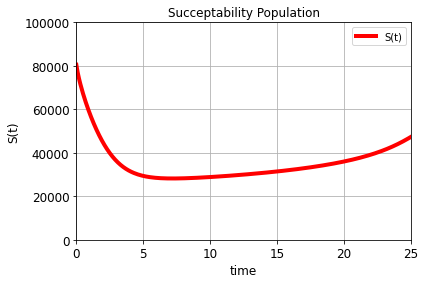

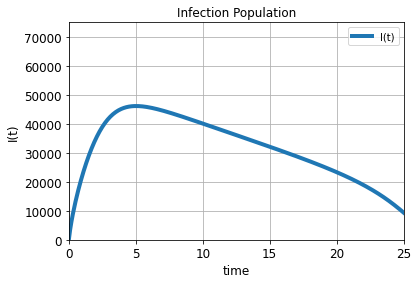

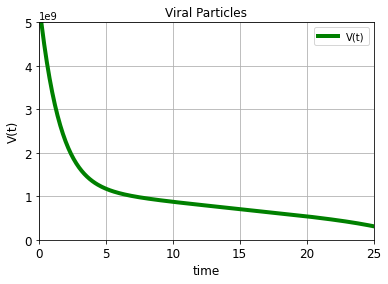

In [ ]:
runSimulation(0.35,0,0)

This is our mask-wearing intervention simulation where a 0.35 intervention scale is used. Again, Susceptibility and Infection populations have a steady inverse relationship. The Susceptibility population spike is shifted a few time steps as the rate of which the population is getting infected is dampened. This relationship is mirrored in the Infection population where the infected spike is both dampened and shifted a few time steps. Something interesting with this intervention is that over time, the Susceptibility population rises. The rate at which Viral Particles are spread in the population environment is dampened as well due to mask inhibiting individuals from spreading viral particles on surfaces. 

###Disinfectant Only

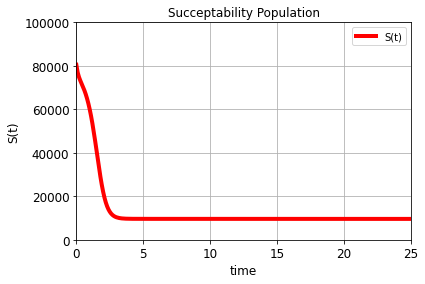

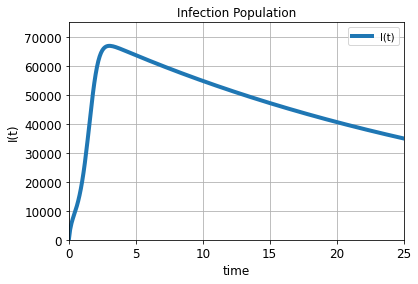

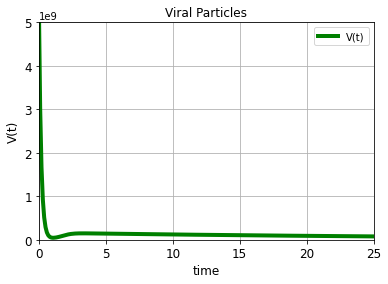

In [ ]:
runSimulation(0,4,0)

This is our disinfectant use intervention simulation where a 4.0 intervention scale is used. Again, Susceptibility and Infection populations have a steady inverse relationship. The Susceptibility population spike is slightly shifted a few time steps as well as slightly varied. This relationship is mirrored in the Infection population where the infected spike is both slightly varied and shifted a few time steps. This intervention method does not seem to reduce the amplitude of the negative spike in Susceptibility and Infected populations. However, this intervention method aggressively affects the rate at which Viral Particles decay in the population environment.

### Medical Treatment

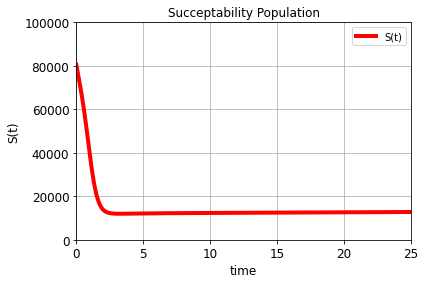

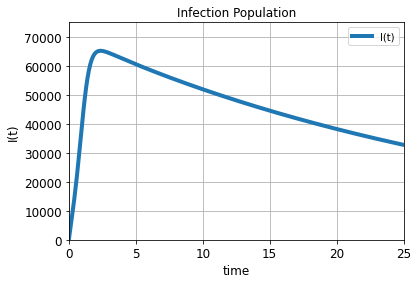

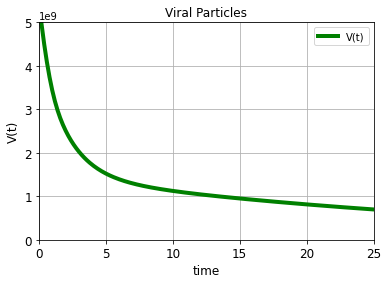

In [ ]:
runSimulation(0,0,0.9)

This is our medical treatments intervention simulation where a 0.9 intervention scale is used. Again, Susceptibility and Infection populations have a steady inverse relationship. Here, the negative Susceptibility population spike and the positive Infected population spike are slightly dampened. This intervention method does not seem to have an impact on Viral Particles in the population environment.

### Medical Treatment and Mask Wearing 

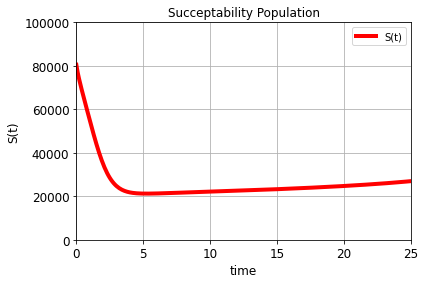

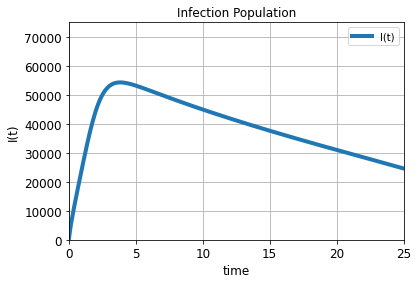

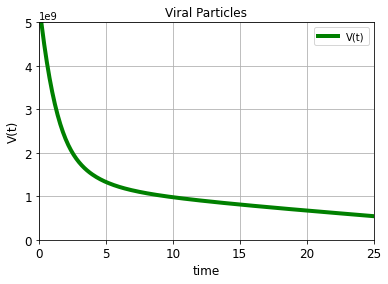

In [ ]:
runSimulation(0.2,0,0.9)

This simulation incorporates two intervention methods: mask-wearing and medical treatments. The behavior of these models is expected -- we saw from the single intervention models that mask-wearing both dampened and delayed the Susceptibility and Infection spikes while medical treatments only slightly dampened the Susceptibility and Infection spikes. It is expected that we don't see any change in the Viral Particles model. 

Disinfectant and Medical Treatment

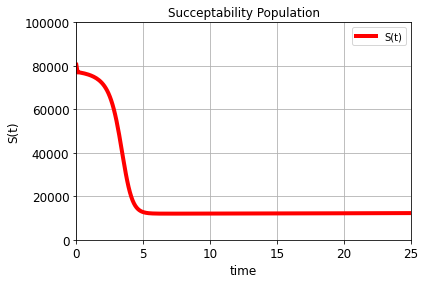

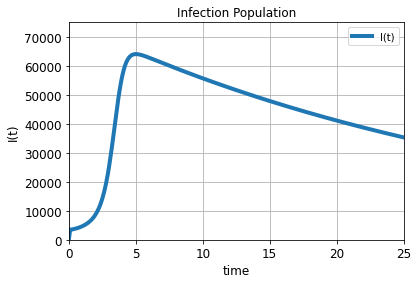

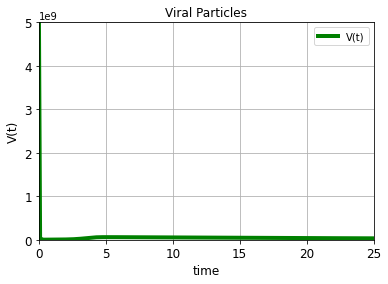

In [ ]:
runSimulation(0,10,0.7)

This simulation incorporates two intervention methods: disinfectant and medical treatments. The behavior of these models is expected -- we saw from the single intervention models that disinfectants slightly shifted the Susceptibility and Infection spikes and heavily impacted the Viral Particle population while medical treatments only slightly dampened the Susceptibility and Infection spikes.

Disinfectant and Masks

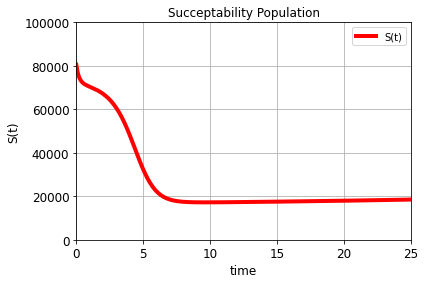

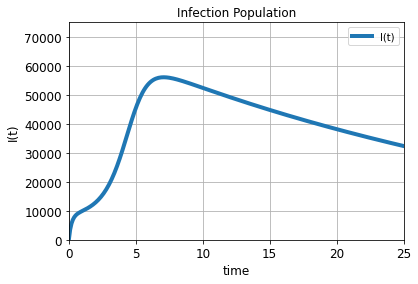

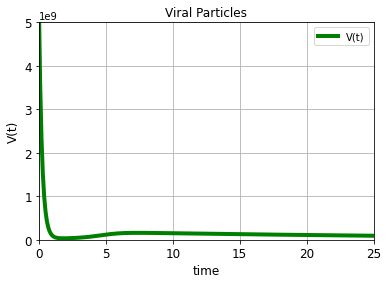

In [ ]:
runSimulation(0.21,3,0)

This simulation incorporates two intervention methods: disinfectant and mask-wearing. The behavior of these models is expected -- we saw from the single intervention models that disinfectants slightly shifted the Susceptibility and Infection spikes and heavily impacted the Viral Particle population while mask-wearing both dampened and delayed the Susceptibility and Infection spikes.

### All Intervention Methods

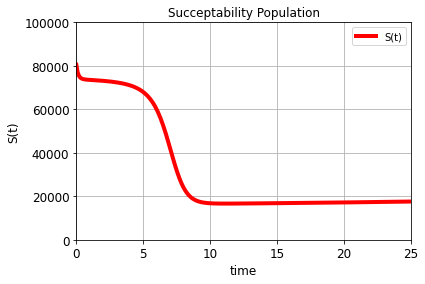

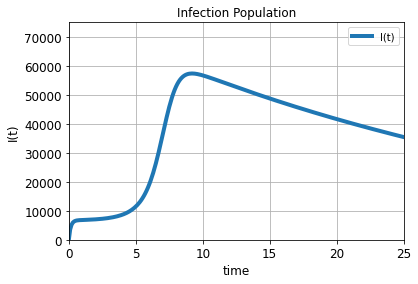

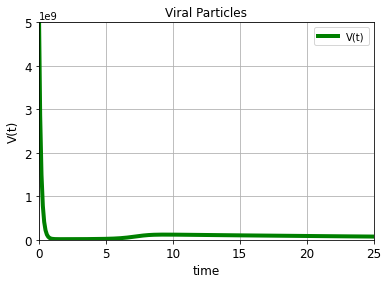

In [ ]:
runSimulation(0.1,4.3,0.9) 

This simulation incorporates all three of intervention methods: disinfectants, mask-wearing, and medical treatments. Each intervention method has its own unique impact on the model which can be seen in this simulation. Susceptibility and Infection spikes are quite delayed and dampened while the Viral Particle population has been exponentially decreased. 

### Takeaways

Interventions delay the spike.
Death rate has gone down with the vaccine.
It is hard to translate a mathematical paper.